# ADS-500B Final Project

In [1]:
# Import library modules

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 

# For Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### 1.1

Import dataset and describe characteristics. 

In [2]:
path =  r"online_shoppers_intention.csv"
df= pd.read_csv(path)
# For looking at the type of feature,dtypes() is used.
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [3]:
# Dimension of the dataframe.
df.shape

(12330, 18)

In [4]:
# file type of the dataframe
type (df)

pandas.core.frame.DataFrame

### 1.2

Clean, wrangle and handle missing data

In [5]:
# Check for null values

df.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

 There are only null values in the Informational, Page Values and Operating Systems columns within the dataset.

<AxesSubplot: >

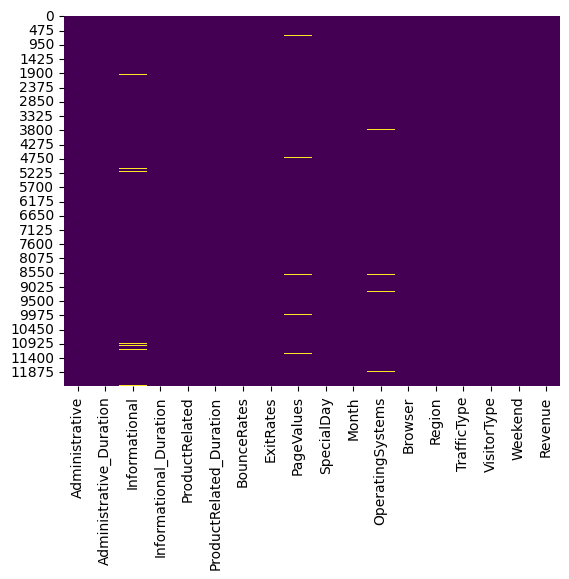

In [6]:
# Visualize null data

sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [7]:
# Impute respective mean values of each column for missing data

df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

To handle the null values, we decided to impute in the respective means for each column. This allows us to keep all of the data points within the dataset, instead of eliminating entire rows because of one missing value. 

In [8]:
# Identify outliers within the dataset

def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5*IQR)) | (df > (q3 + 1.5*IQR)))]
    return outliers

In [9]:
outliers = find_outliers(df["Administrative"])
print('Administrative outliers:', (len(outliers)))
outliers = find_outliers(df["Administrative_Duration"])
print('Administrative_Duration outliers:', (len(outliers)))
outliers = find_outliers(df["Informational"])
print('Informational outliers:', (len(outliers)))
outliers = find_outliers(df["Informational_Duration"])
print('Informational_Duration outliers:', (len(outliers)))
outliers = find_outliers(df["ProductRelated"])
print('ProductRelated outliers:', (len(outliers)))
outliers = find_outliers(df["ProductRelated_Duration"])
print('ProductRelated_Duration outliers:', (len(outliers)))
outliers = find_outliers(df["BounceRates"])
print('BounceRates outliers:', (len(outliers)))
outliers = find_outliers(df["ExitRates"])
print('ExitRates outliers:', (len(outliers)))
outliers = find_outliers(df["PageValues"])
print('PageValues outliers:', (len(outliers)))
outliers = find_outliers(df["SpecialDay"])
print('SpecialDay outliers:', (len(outliers)))
outliers = find_outliers(df["OperatingSystems"])
print('OperatingSystems outliers:', (len(outliers)))
outliers = find_outliers(df["Browser"])
print('Browser outliers:', (len(outliers)))
outliers = find_outliers(df["Region"])
print('Region outliers:', (len(outliers)))
outliers = find_outliers(df["TrafficType"])
print('TrafficType outliers:', (len(outliers)))

Administrative outliers: 404
Administrative_Duration outliers: 1172
Informational outliers: 2731
Informational_Duration outliers: 2405
ProductRelated outliers: 987
ProductRelated_Duration outliers: 961
BounceRates outliers: 1551
ExitRates outliers: 1099
PageValues outliers: 2839
SpecialDay outliers: 1251
OperatingSystems outliers: 110
Browser outliers: 4369
Region outliers: 511
TrafficType outliers: 2101


There are quite a few outliers within the dataset. We opted to leave the outliers in the dataset because they represent real user sessions from the company’s website that may be helpful in determining whether revenue was made. 

### 1.3

Transform data appropriately using techniques such as aggregation, normalization, and feature construction.

Our first data transformation technique is aggregation. The code below aggregates sales data over a given month. The most sales are in November.

In [10]:
# Subset Month and Revenue.
month_revenue = df[["Month", "Revenue"]]

# Subset True values
sales = month_revenue.loc[month_revenue['Revenue'] == True]

# Group by Month, count True (sale)
month_sales = sales.groupby("Month").count()
month_sales

,Revenue
Month,
Aug,76
Dec,216
Feb,3
Jul,66
June,29
Mar,192
May,365
Nov,760
Oct,115


Our second data transformation technique is standardization, which is not bounded by range. Below, I standardized (μ = 0 and σ = 1) the numerical values in our dataset and stored these standardized numerical values in scaled_data.

In [11]:
# drop string columns and one boolean column 
# so only numerical values are standardized later
numdf = df.drop(columns=['Month', 'VisitorType', 'Weekend', 'Revenue'])
numdf.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1.0,1,1,1
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2.0,2,1,2
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4.0,1,9,3
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3.0,2,2,4
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3.0,3,1,4


In [12]:
# standardize data
# Revenue is the dependent variable

# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(numdf) 

# convert to dataframe
# pd.DataFrame(scaled_data)

df2 = pd.DataFrame(scaled_data, columns = numdf.columns)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.696993,-0.457191,-0.398484,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.319023,-0.308821,-1.238511,-0.790293,-0.894178,-0.762629
1,-0.696993,-0.457191,-0.398484,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.319023,-0.308821,-0.136258,-0.207952,-0.894178,-0.514182
2,-0.696993,-0.457191,-0.398484,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.319023,-0.308821,2.068249,-0.790293,2.437081,-0.265735
3,-0.696993,-0.457191,-0.398484,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.319023,-0.308821,0.965995,-0.207952,-0.477771,-0.017289
4,-0.696993,-0.457191,-0.398484,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.319023,-0.308821,0.965995,0.374389,-0.894178,-0.017289


df2 is our dataset df with string and boolean columns dropped. The numerical values in df2 have all been standardized. The next step is to add string and boolean columns from df to df2.

In [13]:
# adding string and boolean columns from df to df2
month = df['Month']
visitor = df['VisitorType']
weekend = df['Weekend']
revenue = df['Revenue']

df2.insert(loc=10, column="Month", value=month)
df2.insert(loc=15, column="VisitorType", value=visitor)
df2.insert(loc=16, column="Weekend", value=weekend)
df2.insert(loc=17, column="Revenue", value=revenue)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.398484,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.319023,-0.308821,Feb,-1.238511,-0.790293,-0.894178,-0.762629,Returning_Visitor,False,False
1,-0.696993,-0.457191,-0.398484,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.319023,-0.308821,Feb,-0.136258,-0.207952,-0.894178,-0.514182,Returning_Visitor,False,False
2,-0.696993,-0.457191,-0.398484,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.319023,-0.308821,Feb,2.068249,-0.790293,2.437081,-0.265735,Returning_Visitor,False,False
3,-0.696993,-0.457191,-0.398484,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.319023,-0.308821,Feb,0.965995,-0.207952,-0.477771,-0.017289,Returning_Visitor,False,False
4,-0.696993,-0.457191,-0.398484,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.319023,-0.308821,Feb,0.965995,0.374389,-0.894178,-0.017289,Returning_Visitor,True,False


df2 has the values from df, except all the numerical values have been standardized.

We can also apply the transformation technique feature construction. In this case, I am dropping the OperatingSystems column. Not only does it have the third most missing values (123), I do not believe that it affects our dependent variable Revenue in a significant way.

In [14]:
df2 = df2.drop(columns=['OperatingSystems'])
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.398484,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.319023,-0.308821,Feb,-0.790293,-0.894178,-0.762629,Returning_Visitor,False,False
1,-0.696993,-0.457191,-0.398484,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.319023,-0.308821,Feb,-0.207952,-0.894178,-0.514182,Returning_Visitor,False,False
2,-0.696993,-0.457191,-0.398484,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.319023,-0.308821,Feb,-0.790293,2.437081,-0.265735,Returning_Visitor,False,False
3,-0.696993,-0.457191,-0.398484,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.319023,-0.308821,Feb,-0.207952,-0.477771,-0.017289,Returning_Visitor,False,False
4,-0.696993,-0.457191,-0.398484,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.319023,-0.308821,Feb,0.374389,-0.894178,-0.017289,Returning_Visitor,True,False


### 1.4

Reduce redundant data and perform need-based discretization. 

Discretization helps to get a better correlation coefficient for the dependant variable. 

In [15]:
#finding variable with better influence with dependent variable 
df.corr()



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.371990,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098541,-0.094778,-0.005120,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.300981,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067395,-0.073304,-0.006370,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.371990,0.300981,1.000000,0.617516,0.371025,0.384577,-0.115044,-0.162217,0.047676,-0.048061,-0.008553,-0.037132,-0.028761,-0.033651,0.034135,0.094079
Informational_Duration,0.255848,0.238031,0.617516,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030234,-0.030577,-0.010054,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.371025,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056446,-0.023958,0.004762,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.384577,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052617,-0.036380,0.003900,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.115044,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.118383,0.072702,0.023156,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.162217,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.173479,0.102242,0.014177,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098541,0.067395,0.047676,0.030234,0.056446,0.052617,-0.118383,-0.173479,1.000000,-0.065159,0.019185,0.045129,0.010944,0.013348,0.011844,0.489707
SpecialDay,-0.094778,-0.073304,-0.048061,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.065159,1.000000,0.013299,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [16]:
# "PageValues", "ProductRelated" "ExitRates", "BounceRates" shows greater correlation coefficient. 
# eliminate all the duplicate value from the dataset.  
df2= df2.drop_duplicates(subset=["PageValues", "ProductRelated_Duration" , "ExitRates", "BounceRates"])
# in df2, there is not any duplicate value. 

In [17]:
# converting them into categorical data with ordinal labeling.
label1= ["Low", "Moderate", "High", "Very High", "Extreme"]
df2["disc_ProductRelated_Duration"]  =pd.qcut( df2.ProductRelated_Duration , q=5, labels=label1, duplicates= "drop")
df2["disc_ExitRates"]= pd.qcut( df2.ExitRates , q=5, labels= label1, duplicates= "drop")
label2= ["Low", "Moderate", "High", ]
df2["disc_PageValues"]  = pd.qcut( df2.PageValues, q=10, labels=label2, duplicates= "drop")
df2["disc_BounceRates"] = pd.qcut(df2.BounceRates, q=5,duplicates='drop', labels= label2)


In [18]:
# attaching all different types of data into one dataframe. 
df_nomical= df[['Month', 'VisitorType', 'Weekend', 'Revenue']]
df2 [["Month",'VisitorType', 'Weekend', 'Revenue']] = df_nomical 
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,disc_ProductRelated_Duration,disc_ExitRates,disc_PageValues,disc_BounceRates
0,-0.696993,-0.457191,-0.398484,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.319023,-0.308821,...,-0.790293,-0.894178,-0.762629,Returning_Visitor,False,False,Low,Extreme,Low,High
1,-0.696993,-0.457191,-0.398484,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.319023,-0.308821,...,-0.207952,-0.894178,-0.514182,Returning_Visitor,False,False,Low,Extreme,Low,Low
3,-0.696993,-0.457191,-0.398484,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.319023,-0.308821,...,-0.207952,-0.477771,-0.017289,Returning_Visitor,False,False,Low,Extreme,Low,High
4,-0.696993,-0.457191,-0.398484,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.319023,-0.308821,...,0.374389,-0.894178,-0.017289,Returning_Visitor,True,False,High,Extreme,Low,High
5,-0.696993,-0.457191,-0.398484,-0.244931,-0.286270,-0.543757,-0.132035,-0.380935,-0.319023,-0.308821,...,-0.207952,-0.894178,-0.265735,Returning_Visitor,False,False,Low,High,Low,Moderate


### 2.1

Identifying  categorical, ordinal, and numerical variables within the data

In [19]:
#converting boolean values into integer value
df2= df2.replace({True: 1, False: 0})
#converting each categorical value into numeric value
df2.replace(['Low', 'Moderate','High','Very High','Extreme'],[0, 1, 2, 3, 4], inplace=True)
# converting categorical data into numerical value 
df2["disc_ProductRelated_Duration"]=df2["disc_ProductRelated_Duration"].astype("int64")
df2["disc_ExitRates"] = df2 ["disc_ExitRates"].astype("int64")
df2["disc_PageValues"] = df2["disc_PageValues"].astype ("int64")
df2["disc_BounceRates"] = df2["disc_BounceRates"].astype ("int64")
df2.dtypes

Administrative                  float64
Administrative_Duration         float64
Informational                   float64
Informational_Duration          float64
ProductRelated                  float64
ProductRelated_Duration         float64
BounceRates                     float64
ExitRates                       float64
PageValues                      float64
SpecialDay                      float64
Month                            object
Browser                         float64
Region                          float64
TrafficType                     float64
VisitorType                      object
Weekend                           int64
Revenue                           int64
disc_ProductRelated_Duration      int64
disc_ExitRates                    int64
disc_PageValues                   int64
disc_BounceRates                  int64
dtype: object

### 2.2

Measures of centrality and distribution with visualizations

/tmp/ipykernel_140/1074658637.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


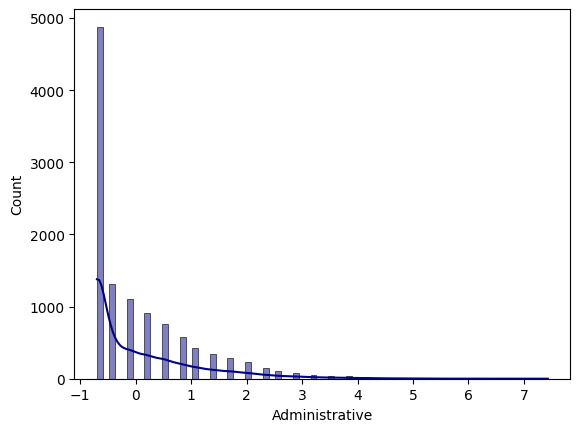

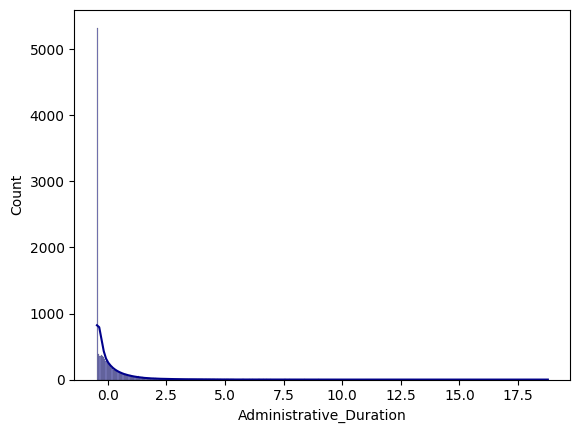

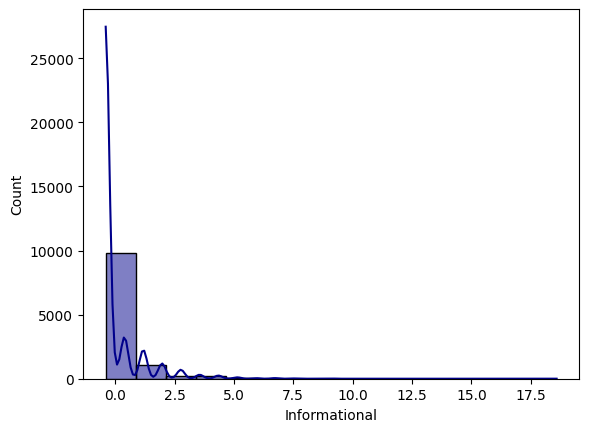

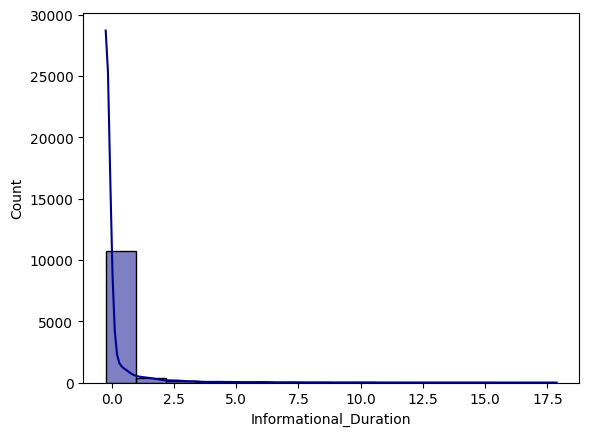

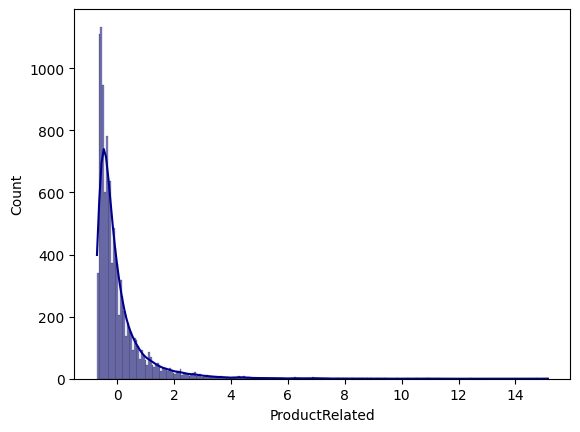

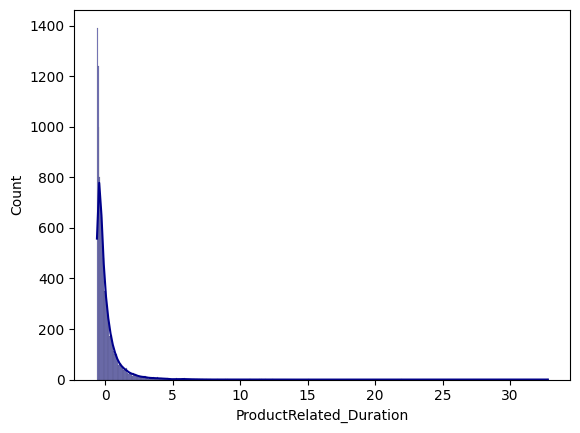

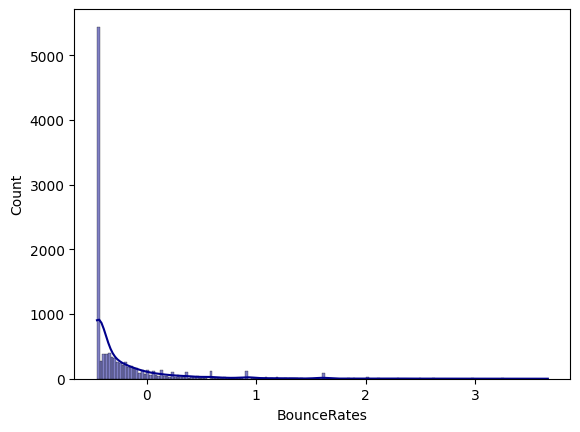

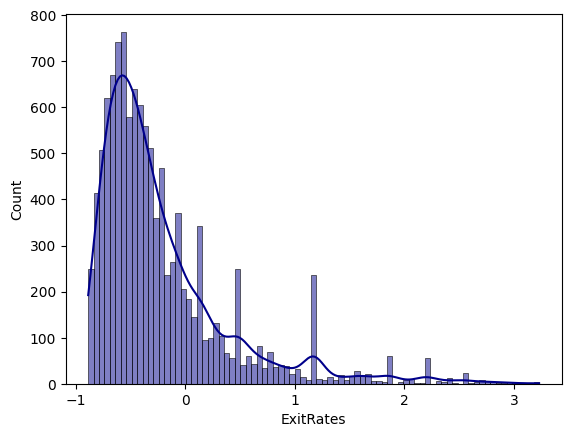

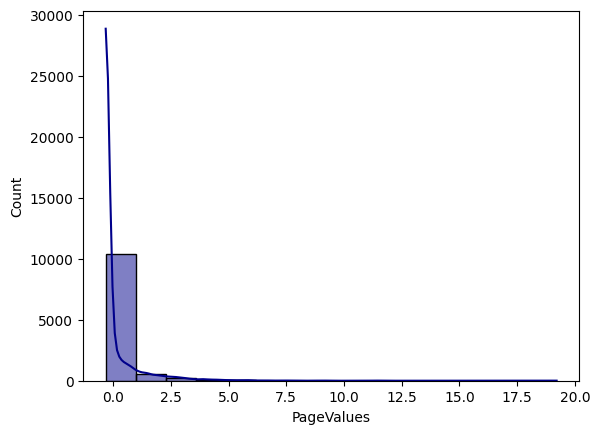

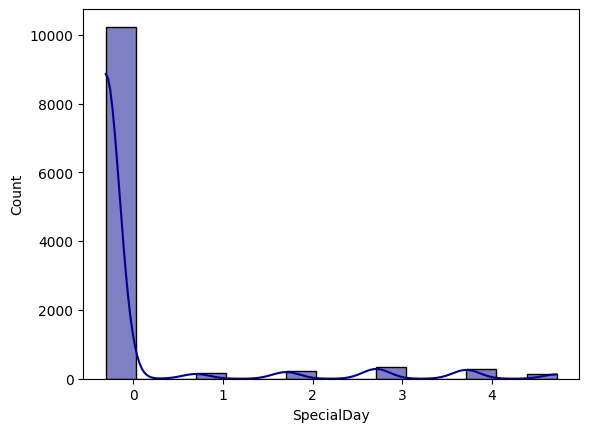

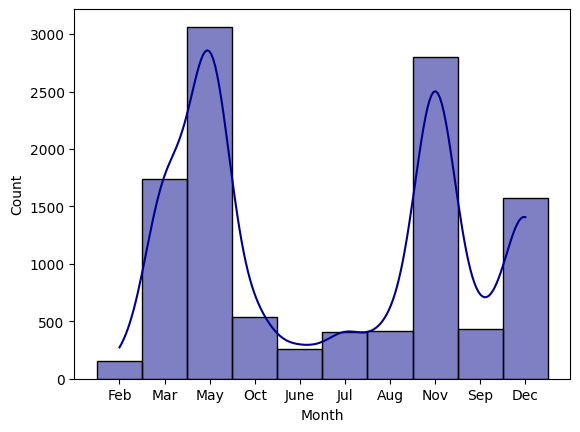

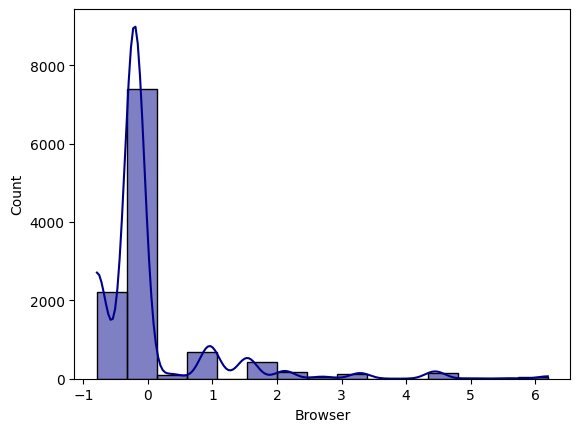

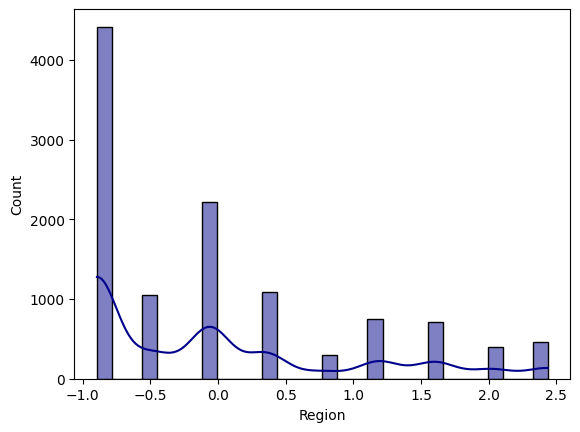

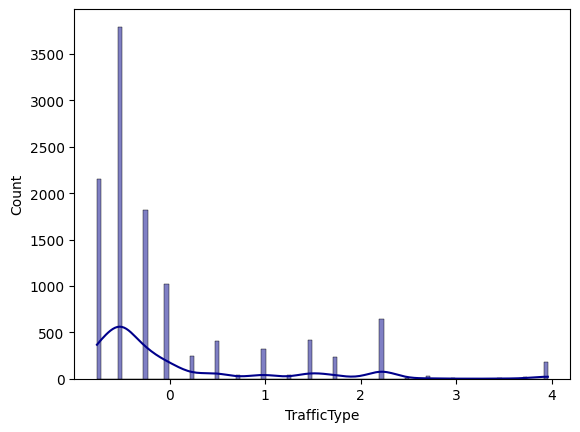

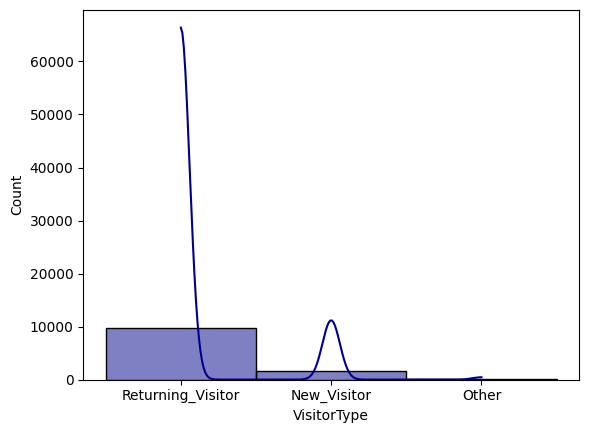

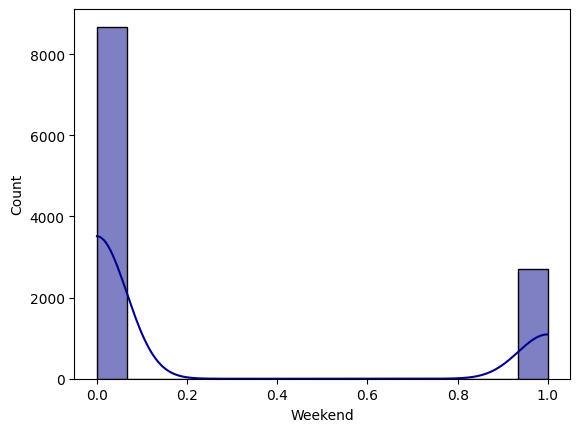

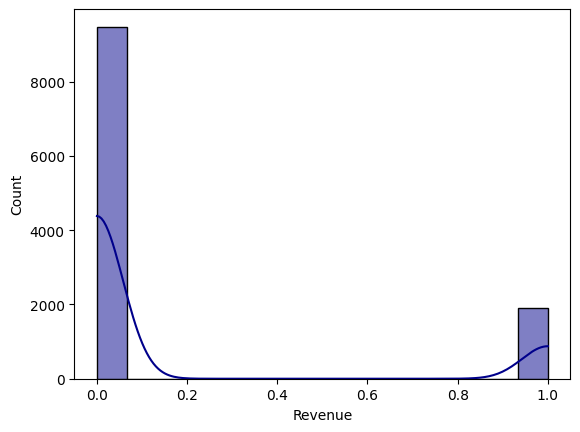

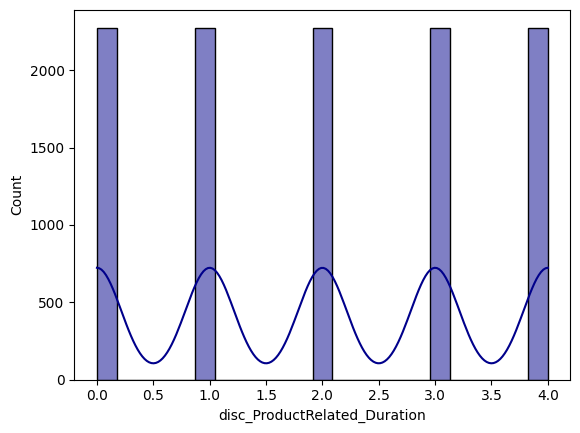

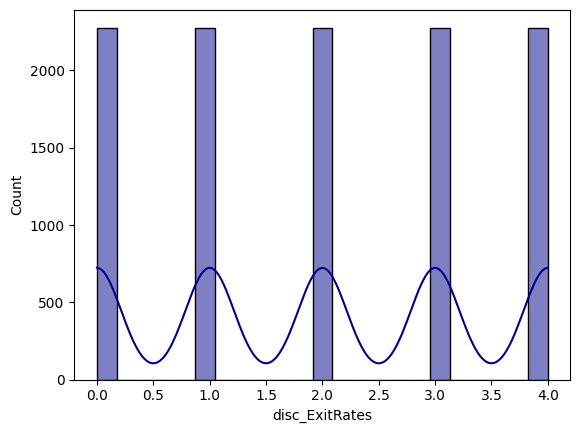

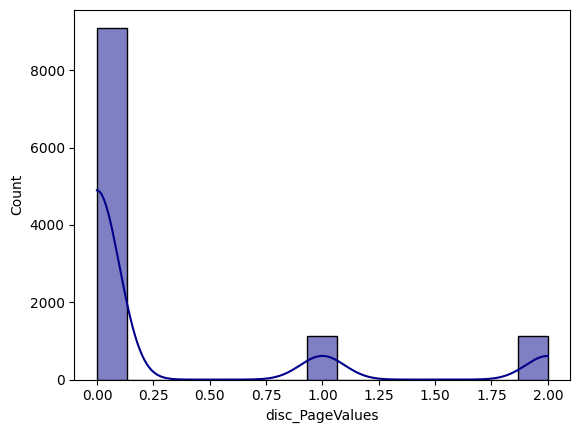

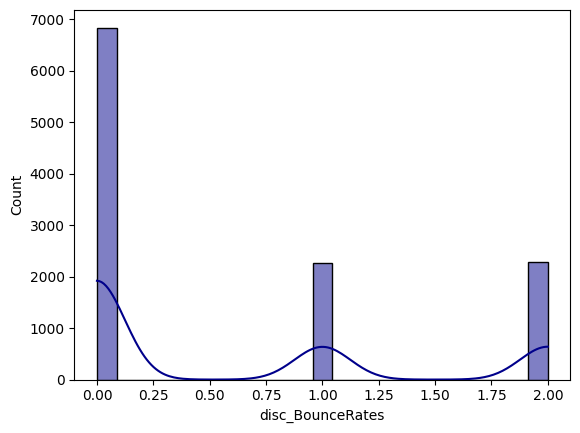

In [20]:
for i, col in enumerate(df2.columns):
    plt.figure(i)
    sns.histplot(df2[col],kde=True,color="darkblue")

### 2.3

Diagnose for correlations between variables and determine independent and dependent variables


In [21]:
# identifying independant variable with dependent variable. 
df2.corr() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Browser,Region,TrafficType,Weekend,Revenue,disc_ProductRelated_Duration,disc_ExitRates,disc_PageValues,disc_BounceRates
Administrative,1.000000,0.592979,0.360709,0.247810,0.409538,0.352177,-0.171254,-0.293771,0.083049,-0.099577,-0.025546,-0.005031,-0.029772,0.019750,0.119956,0.343915,-0.290103,0.163732,-0.131018
Administrative_Duration,0.592979,1.000000,0.291974,0.231882,0.272263,0.341560,-0.103063,-0.186050,0.056697,-0.076146,-0.015662,-0.006444,-0.011685,0.010275,0.080593,0.253407,-0.186852,0.106152,-0.075000
Informational,0.360709,0.291974,1.000000,0.615548,0.359322,0.373812,-0.072039,-0.137467,0.038222,-0.050770,-0.038297,-0.029288,-0.032860,0.031152,0.083387,0.286722,-0.112947,0.090075,-0.029881
Informational_Duration,0.247810,0.231882,0.615548,1.000000,0.272210,0.341099,-0.048010,-0.090227,0.023956,-0.031719,-0.020097,-0.028039,-0.023781,0.022131,0.063212,0.207364,-0.076808,0.071756,-0.024260
ProductRelated,0.409538,0.272263,0.359322,0.272210,1.000000,0.856049,-0.131589,-0.254544,0.039571,-0.025247,-0.013501,-0.039616,-0.039731,0.009089,0.140769,0.600149,-0.249313,0.079250,-0.091914
ProductRelated_Duration,0.352177,0.341560,0.373812,0.341099,0.856049,1.000000,-0.113877,-0.204947,0.037039,-0.038034,-0.007305,-0.034314,-0.032886,0.000371,0.135806,0.634834,-0.178876,0.081331,-0.066192
BounceRates,-0.171254,-0.103063,-0.072039,-0.048010,-0.131589,-0.113877,1.000000,0.792661,-0.115401,0.169521,-0.041462,-0.027173,0.110462,-0.044584,-0.138891,-0.205238,0.523219,-0.137405,0.751771
ExitRates,-0.293771,-0.186050,-0.137467,-0.090227,-0.254544,-0.204947,0.792661,1.000000,-0.181326,0.176936,-0.010704,-0.022103,0.090419,-0.060312,-0.204386,-0.381555,0.807689,-0.218859,0.594581
PageValues,0.083049,0.056697,0.038222,0.023956,0.039571,0.037039,-0.115401,-0.181326,1.000000,-0.067803,0.048164,0.011897,0.017068,0.008570,0.486498,0.127454,-0.220514,0.764720,-0.131820
SpecialDay,-0.099577,-0.076146,-0.050770,-0.031719,-0.025247,-0.038034,0.169521,0.176936,-0.067803,1.000000,0.008778,-0.014525,0.054568,-0.019043,-0.085310,-0.048356,0.157665,-0.074816,0.154047


disc_PageValues, disc_ProductRelated_Duration show higher positive correlation coefficient and  disc_BounceRates and disc_ExitRates show higher negative correlation coefficient. These 4 can be independent variable to find out dependent variable "Revenue".  

### 2.4

We are now performing exploratory analysis in combination with visualization techniques to discover patterns and features of interest.

We counted and replaced missing values in 1.2.2, and for the sake of a thorough exploratory analysis, we have gone back and added a heat map of the missing values in the original dataset before imputation. 

Now we are examining the association between the independent variables and our target variable Revenue. In 2.3, we checked the correlation between different variables. Below is a heat map visualization of the same work.

<AxesSubplot: >

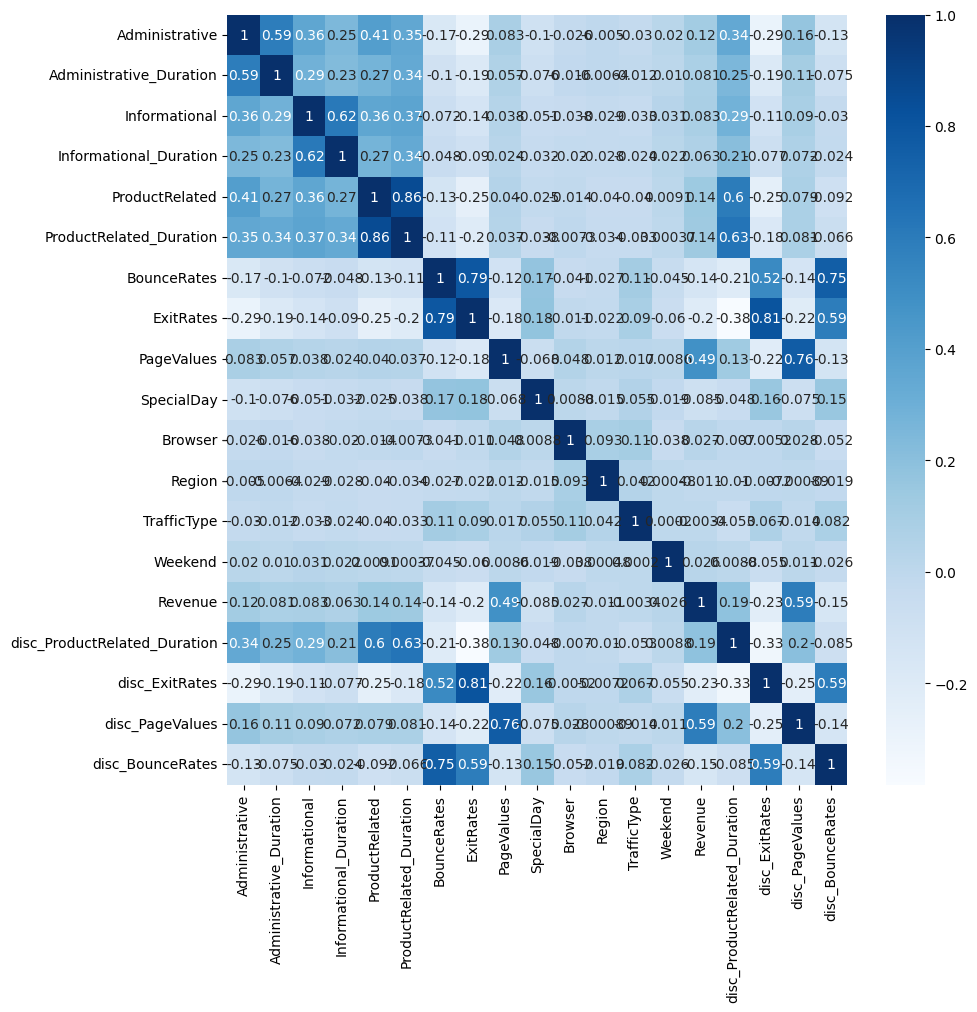

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),cbar=True,annot=True,cmap='Blues')

The heat map visualization shows that the variables with positive correlations to Revenue are disc_PageValues (.592) and PageValues (0.486). The negative correlations are too low to be significant.

An analytical question that emerges from this visualization is what are the page values by category? That is, which page category is most valuable, which would then correlate positively with our target variable Revenue?

Text(0, 0.5, 'Duration')

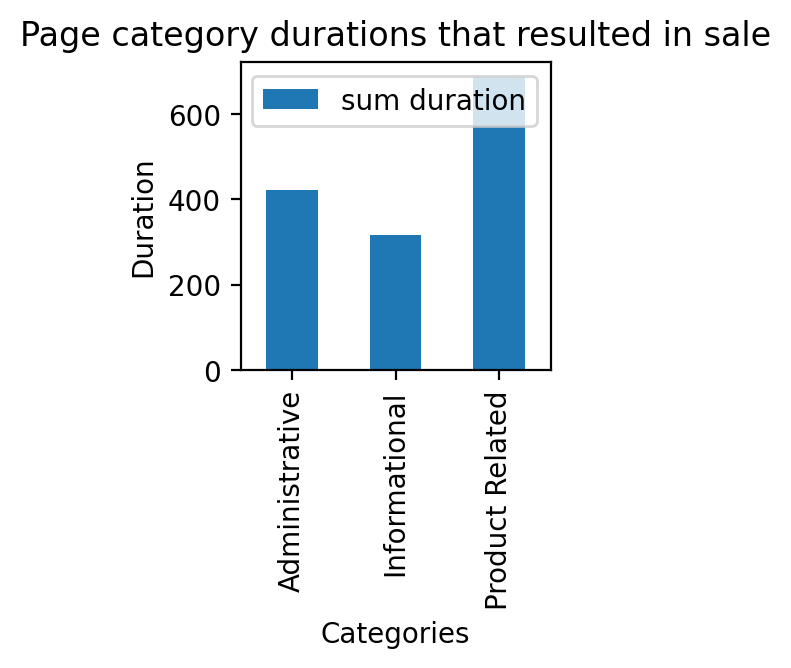

In [23]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt # add to first cell later
plt.rcParams["figure.figsize"] = [2, 2] 
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

# select rows where Revenue happened
sale = df2.loc[df2['Revenue'] == True]

# sum columns for page categories
admin_sum = sale['Administrative_Duration'].sum() # 421.1149854417906
info_sum = sale['Informational_Duration'].sum() # 316.86991229235355
prod_sum = sale['ProductRelated_Duration'].sum() # 687.5717893601053

# create new dataframe
plotdata = pd.DataFrame(
    {"sum duration": [421.11, 316.87, 687.57]}, 
    index=["Administrative", "Informational", "Product Related"])
# Plot a bar chart
plotdata.plot(kind="bar")
plt.title("Page category durations that resulted in sale")
plt.xlabel("Categories")
plt.ylabel("Duration")

The visualization above is a bar plot that compares the duration rates of each page category that resulted in a sale. As you can see, the more a consumer spent time on product related pages, the more likely it was that the site visit resulted in revenue.

### 3.1

Determine the need for a machine learning method and identify dependent and independent variables.

We are going to utilize logistic regression method of supervised learning to predict if revenue is going to be made based on the user's activity on the website. We are using a supervised learning method because our dataset contains the inputs and outputs that will be used to create the model. We are creating a binary logistic regression model because our dependent variable, revenue, only has two outcomes, either revenue is made or not.

In [24]:
# Independent variables

X = df2.iloc[:, 0:10]
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,-0.696993,-0.457191,-0.398484,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.319023,-0.308821
1,-0.696993,-0.457191,-0.398484,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.319023,-0.308821
3,-0.696993,-0.457191,-0.398484,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.319023,-0.308821
4,-0.696993,-0.457191,-0.398484,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.319023,-0.308821
5,-0.696993,-0.457191,-0.398484,-0.244931,-0.286270,-0.543757,-0.132035,-0.380935,-0.319023,-0.308821


In [25]:
# Dependent variable

y = df2.iloc[:, 16]
y.head()

0    0
1    0
3    0
4    0
5    0
Name: Revenue, dtype: int64

### 3.2

Train, test and provide accuracy and evaluation metrics for model results

In [26]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

The normalized dataset is split into training and testing data.

In [27]:
# Logistic regression classifier

model = LogisticRegression(solver = 'lbfgs', random_state = 0)

# Fit data to classifier

model.fit(X_train, y_train)

LogisticRegression(random_state=0)

The binary logistic regression model is created using scikit-learn modules . The training data is fit to the model to train it to recognize patterns of whther revenue is made or not.

In [28]:
# Predicting test data

predicted_y = model.predict(X_test)

# Examine potential user sessions that generate revenue

for x in range(len(predicted_y)):
    if (predicted_y[x] == 1):
        print(x)

1
14
37
48
67
69
82
84
92
112
117
122
131
136
149
156
161
162
163
167
172
187
190
194
217
221
239
256
257
273
293
297
300
307
316
323
338
360
362
373
385
411
426
448
458
472
503
506
520
542
567
568
588
607
612
613
627
641
653
657
661
665
670
671
673
698
700
728
737
762
780
787
800
803
812
822
831
851
865
868
873
885
895
905
934
945
961
966
986
988
991
996
1012
1025
1028
1030
1038
1042
1044
1048
1055
1072
1076
1082
1087
1096
1101
1109
1157
1262
1286
1292
1336
1368
1375
1379
1390
1391
1413
1421
1434
1436
1440
1441
1446
1447
1467
1480
1482
1488
1496
1505
1507
1511
1529
1534
1538
1548
1564
1606
1614
1621
1623
1645
1651
1653
1677
1704
1731
1733
1767
1786
1792
1801
1803
1805
1811
1824
1825
1827
1838
1855
1861
1862
1885
1909
1931
1941
1945
1964
1965
1967
1984
1991
1999
2033
2058
2064
2068
2078
2086
2093
2106
2137
2147
2151
2153
2163
2170
2174
2212
2229
2233
2238
2270
2290
2295
2298
2302
2314
2317
2338
2368
2397
2418
2454
2463
2464
2470
2472
2480
2493
2516
2530
2532
2540
2546
2549
2556
2572
25

The predicted outcomes of the test data are predicted, so that they can be compared with the actual outputs of the test data to determine the accuracy of the model.

In [29]:
# Accuracy metrics

print('Accuracy: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy: 0.87


The model has an 87% accuracy in determining whether revenue is made. This level of accuracy means that the model does a good job at performing predictions of revenue.

Text(0.5, 1.0, 'Confusion Matrix')

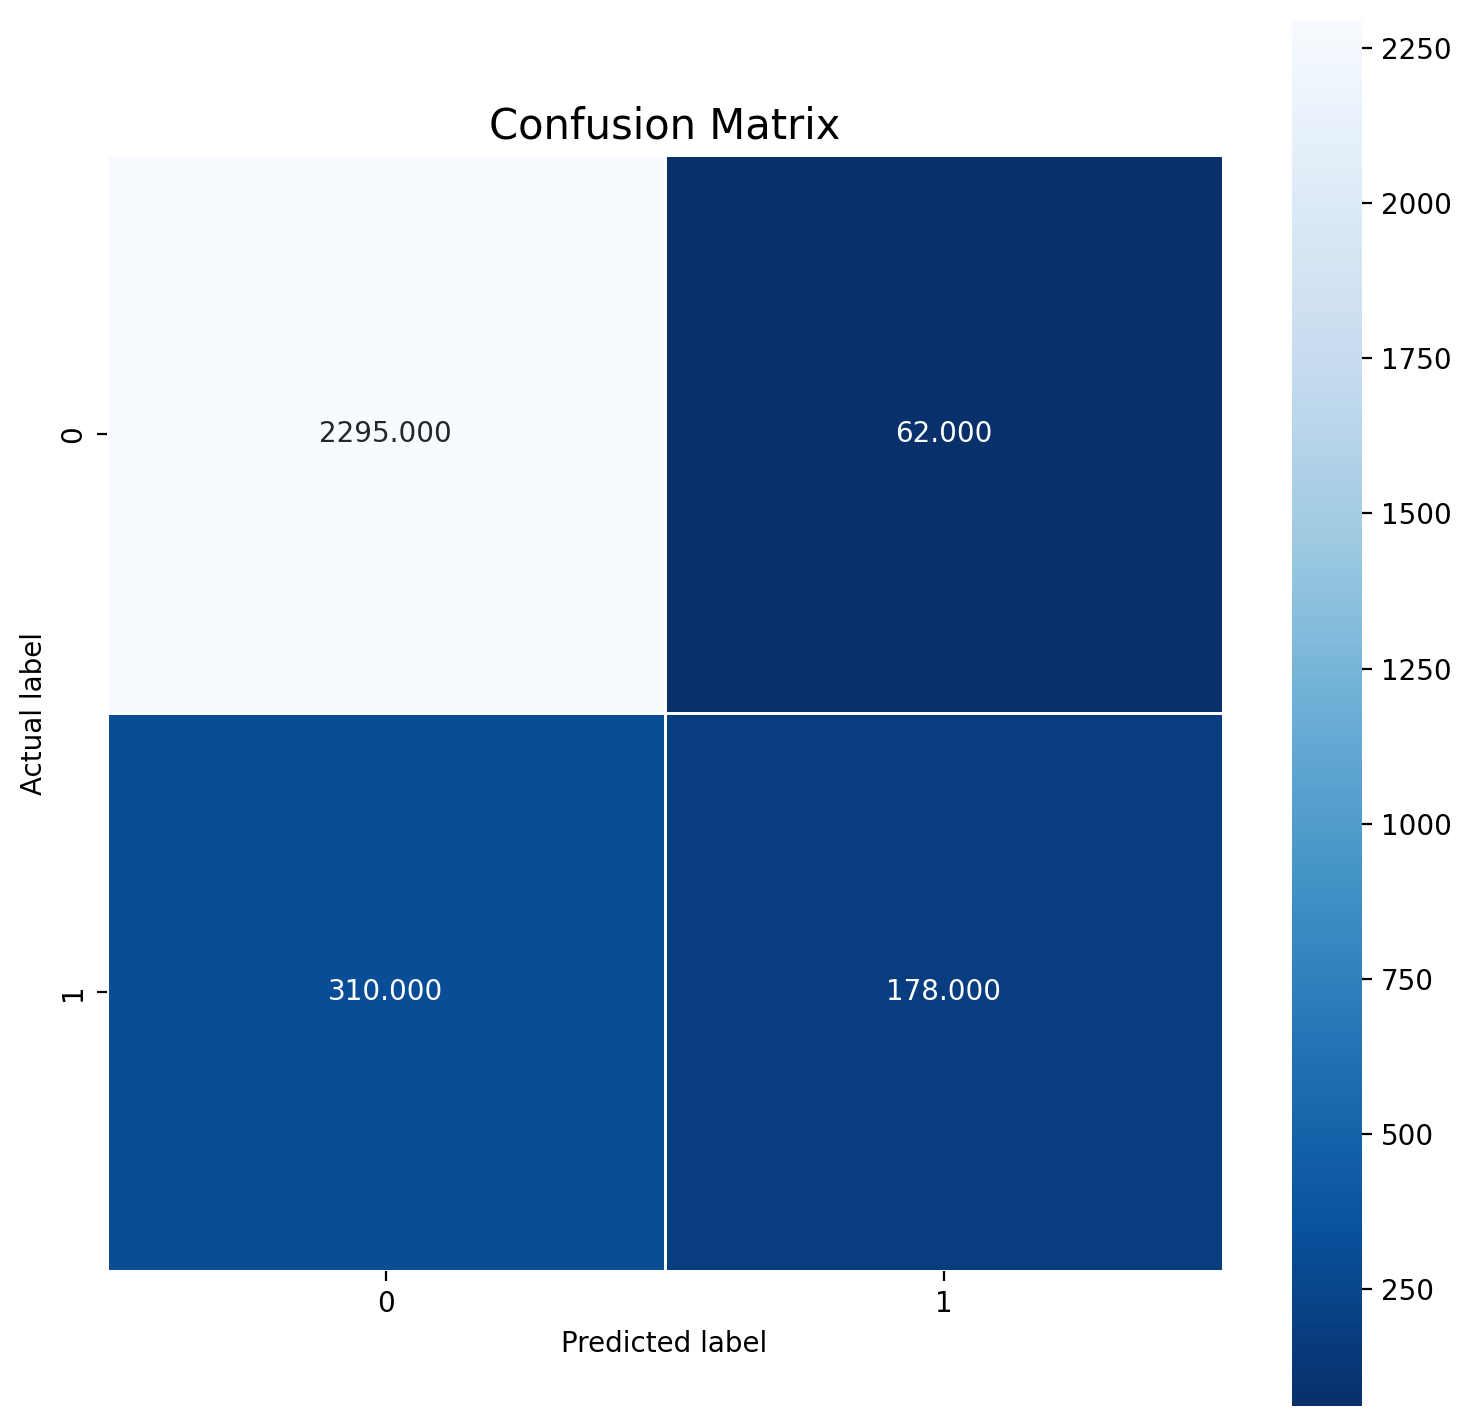

In [30]:
# Confusion matrix

matrix = metrics.confusion_matrix(y_test, predicted_y)

plt.figure(figsize=(9,9))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)

The confusion matrix visualizes the performance of the model by depicting the number of true positives and negatives and false positives and negatives resulting from the model. We can see that the model has proportionately more true positives than false positives, and more true negatives than false negatives.

In [31]:
# Cross validation score

print(cross_val_score(model, X, y, scoring = 'roc_auc', cv = 7))
mean_score = cross_val_score(model, X, y, scoring = 'roc_auc', cv = 7).mean()
std_score = cross_val_score(model, X, y, scoring = 'roc_auc', cv = 7).std()

print(mean_score)
print(std_score)

[0.94943424 0.9106766  0.8472243  0.84027723 0.81427634 0.84169468
 0.83464329]
0.8626038118340328
0.04494448697567971


We conducted 7-fold cross validation for model efficiency and the scores were all above 80%, meaning that the model is able to perform predictions well.

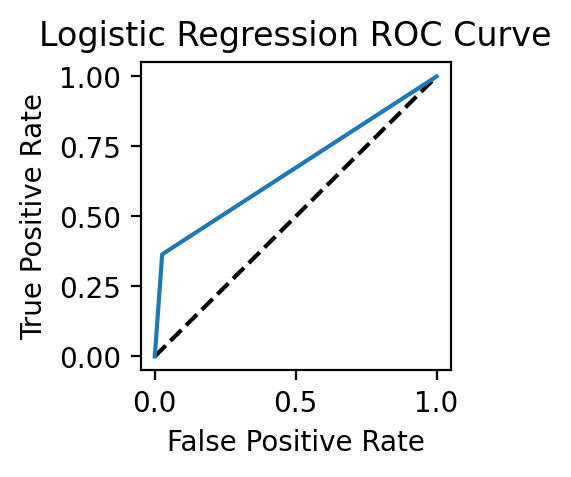

In [32]:
# Plotting the ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, predicted_y)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

The roc curve depicts that the logistic regression model is able to predict true positives better than a random classifier.

In [33]:
# Computing AUC score

print('AUC: {}'.format(roc_auc_score(y_test, predicted_y)))

# Computing cross-validated AUC score

cv_auc = cross_val_score(LogisticRegression(), X, y, scoring = "roc_auc", cv = 5)
print('AUC scores using 5 fold cross validation: {}'.format(cv_auc))

AUC: 0.6692247369189787
AUC scores using 5 fold cross validation: [0.93658505 0.89346044 0.8388568  0.83188565 0.83686945]


 The auc score was 0.67 and the auc scores with 5 fold cross validation were all above 80%, which means that the model is able to predict whether revenue is made better than a random classifier.


The logisitc regression model is able to predict whether revenue is being made from the data obtained from a user's session on the company's website pretty well. The accuracy and cross-validation method scores were above 80%, which suggests that the model is able to predict true positives and negatives better than a random classifier.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6547d4c8-3b6f-4391-ac4b-8e1ff8a04cce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>